In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Generate some toy user and movie data

# Number of users
n_users = 100

# Number of movies
n_movies = 10

# Number of ratings
n_ratings = 1000

# Generate random user ids
user_ids = np.random.randint(0, n_users, n_ratings)

# Generate random movie ids
movie_ids = np.random.randint(0, n_movies, n_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, n_ratings)

# Create a dataframe with the data
df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings})

# We should not have any duplicate ratings for the same user and movie
# Drop any rows that have duplicate user_id and movie_id pairs
df = df.drop_duplicates(['user_id', 'movie_id'])


In [3]:
df

,user_id,movie_id,rating
0,41,0,1
1,67,2,4
2,61,6,1
3,60,0,4
4,72,3,1
...,...,...,...
980,69,7,3
987,52,8,5
988,31,4,2
991,59,0,3


In [4]:
# Create a user-item matrix

A = df.pivot(index='user_id', columns='movie_id', values='rating')
A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,3.0,4.0
1,4.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0
2,1.0,NaN,NaN,4.0,1.0,NaN,1.0,5.0,4.0,NaN
3,NaN,NaN,2.0,NaN,NaN,4.0,NaN,3.0,NaN,5.0
4,4.0,1.0,3.0,2.0,5.0,4.0,1.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
95,5.0,NaN,1.0,NaN,NaN,4.0,1.0,2.0,3.0,5.0
96,2.0,NaN,4.0,4.0,5.0,4.0,4.0,NaN,1.0,5.0
97,NaN,1.0,2.0,5.0,5.0,5.0,NaN,4.0,5.0,NaN


In [5]:
# Fill in the missing values with zeros
A = A.fillna(0)

A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0
1,4.0,3.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,4.0,1.0,0.0,1.0,5.0,4.0,0.0
3,0.0,0.0,2.0,0.0,0.0,4.0,0.0,3.0,0.0,5.0
4,4.0,1.0,3.0,2.0,5.0,4.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
95,5.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,3.0,5.0
96,2.0,0.0,4.0,4.0,5.0,4.0,4.0,0.0,1.0,5.0
97,0.0,1.0,2.0,5.0,5.0,5.0,0.0,4.0,5.0,0.0


In [6]:
# Cosine similarity between U1 and U2

# User 1
u1 = A.loc[0]

# User 2
u2 = A.loc[1]

# Compute the dot product
dot = np.dot(u1, u2)

# Compute the L2 norm
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)

# Compute the cosine similarity
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.4170288281141495

In [7]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(A)

pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.417029,0.524901,0.601407,0.592315,0.402657,0.879499,0.347011,0.555937,0.849385,...,0.735436,0.513870,0.367990,0.568574,0.558489,0.824958,0.567178,0.417836,0.543305,0.466673
1,0.417029,1.000000,0.361659,0.220707,0.778464,0.447785,0.628759,0.408603,0.680069,0.506026,...,0.429377,0.362659,0.165267,0.553260,0.607581,0.491473,0.648767,0.536153,0.469332,0.568878
2,0.524901,0.361659,1.000000,0.263523,0.235945,0.588118,0.602971,0.491935,0.067666,0.417755,...,0.214834,0.967062,0.392777,0.401386,0.638394,0.401643,0.366870,0.762860,0.807719,0.367026
3,0.601407,0.220707,0.263523,1.000000,0.649404,0.752773,0.580319,0.471405,0.584879,0.653857,...,0.830336,0.258647,0.108953,0.583584,0.299078,0.740895,0.611260,0.445362,0.209118,0.580319
4,0.592315,0.778464,0.235945,0.649404,1.000000,0.704830,0.690722,0.492417,0.702486,0.706896,...,0.746257,0.261094,0.325171,0.696682,0.516034,0.733306,0.912151,0.572286,0.378926,0.721649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.824958,0.491473,0.401643,0.740895,0.733306,0.566430,0.891248,0.372070,0.768742,0.882523,...,0.939909,0.322988,0.338048,0.547969,0.641016,1.000000,0.631503,0.454545,0.561017,0.462547
96,0.567178,0.648767,0.366870,0.611260,0.912151,0.745724,0.577075,0.539841,0.490090,0.674173,...,0.610191,0.399711,0.557799,0.855039,0.554040,0.631503,1.000000,0.650023,0.553414,0.763228
97,0.417836,0.536153,0.762860,0.445362,0.572286,0.848001,0.590747,0.451383,0.238247,0.436804,...,0.365598,0.833444,0.363928,0.594535,0.449544,0.454545,0.650023,1.000000,0.678543,0.507673
98,0.543305,0.469332,0.807719,0.209118,0.378926,0.464319,0.612968,0.329537,0.264648,0.548927,...,0.365318,0.736321,0.615172,0.611934,0.738787,0.561017,0.553414,0.678543,1.000000,0.323201


<AxesSubplot:>

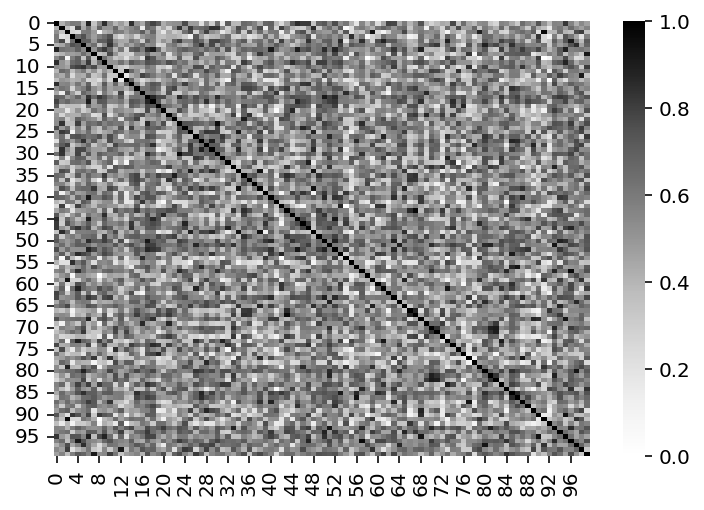

In [8]:
import seaborn as sns

sns.heatmap(sim_matrix, cmap='Greys')


In [9]:
# Find the most similar users to user u 

def k_nearest_neighbors(A, u, k):
    """Find the k nearest neighbors for user u"""
    # Find the index of the user in the matrix
    u_index = A.index.get_loc(u)
    
    # Compute the similarity between the user and all other users
    sim_matrix = cosine_similarity(A)

    # Find the k most similar users
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    
    # Return the user ids
    return A.index[k_nearest]

In [10]:
k_nearest_neighbors(A, 0, 5)

Int64Index([6, 45, 9, 14, 95], dtype='int64', name='user_id')

In [11]:
# Show matrix of movie ratings for u and k nearest neighbors

def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [12]:
show_neighbors(A, 0, 5)

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0
6,5.0,2.0,0.0,1.0,2.0,2.0,0.0,3.0,5.0,5.0
45,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,4.0
9,5.0,1.0,5.0,0.0,0.0,2.0,2.0,2.0,4.0,5.0
14,1.0,1.0,3.0,4.0,1.0,0.0,0.0,0.0,4.0,4.0
95,5.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,3.0,5.0


In [13]:
# Rating for user u for movie 0 is: (4.0 + 3.0) / 2 = 3.5 (Discard 0s)

def predict_rating(A, u, m, k=5):
    """Predict the rating for user u for movie m"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Get the ratings for movie m
    ratings = df[m]
    
    # Calculate the mean of the ratings
    mean = ratings[1:][ratings != 0].mean()
    
    # Return the mean
    return mean

In [14]:
predict_rating(A, 0, 0)

3.6

In [15]:
# Now working with real data

# Load the data

df = pd.read_excel("mov-rec.xlsx")
df.head()

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2023-04-11 10:58:44.990,Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
1,2023-04-11 10:59:49.617,Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
2,2023-04-11 11:12:44.033,Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
3,2023-04-11 11:13:48.674,Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
4,2023-04-11 11:13:55.658,Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0


In [16]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
Dhruv,NaN,NaN,5.0,5.0,3.0,NaN,5.0,5.0,4.0,5.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Zeel B Patel,5.0,4.0,5.0,4.0,4.0,4.0,NaN,2.0,NaN,5.0
Neel,4.0,NaN,5.0,5.0,3.0,3.0,5.0,5.0,NaN,4.0


In [23]:
df.index

Index(['Nipun', 'Gautam Vashishtha', 'Eshan Gujarathi', 'Sai Krishna Avula',
       'Ankit Yadav ', 'Dhruv', 'Saatvik Rao ', 'Zeel B Patel', 'Neel ',
       'Sachin Jalan ', 'Ayush Shrivastava', '....', 'Hari Hara Sudhan',
       'Etikikota Hrushikesh', 'Chirag', 'Aaryan Darad', 'Hetvi Patel',
       'Kalash Kankaria', 'Rachit Verma', 'shriraj', 'Bhavini Korthi ',
       'Hitarth Gandhi ', 'Radhika Joglekar ', 'Medhansh Singh', 'Arun Mani',
       'Satyam ', 'Karan Kumar ', 'R Yeeshu Dhurandhar', 'Satyam Gupta',
       'rushali', 'shridhar', 'Tanvi Jain ', 'Manish Prabhubhai Salvi ',
       'Varun Barala', 'Kevin Shah ', 'Inderjeet', 'Gangaram Siddam ', 'Aditi',
       'Madhuri Awachar', 'Anupam', 'Jinay', 'Shrutimoy', 'Aadesh Desai',
       'Dhairya', 'Rahul C'],
      dtype='object', name='Your name')

In [21]:
# Get index for user and movie
user = 'Dhruv'

print(user in df.index)

# Get the movie ratings for user
#user_ratings = df.loc[user]
#user_ratings

True


In [31]:
df_copy = df.copy()
df_copy.fillna(0, inplace=True)
show_neighbors(df_copy, user, 5)


,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Dhruv,0.0,0.0,5.0,5.0,3.0,0.0,5.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Neel,4.0,0.0,5.0,5.0,3.0,3.0,5.0,5.0,0.0,4.0
Hari Hara Sudhan,4.0,3.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0
Chirag,5.0,3.0,4.0,5.0,5.0,2.0,3.0,4.0,2.0,5.0


In [32]:
# Predict the rating for user u for movie m

predict_rating(df_copy, user, 'The Dark Knight')

4.8

In [34]:
predict_rating(df_copy, user, 'Sholay')

4.0